In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn
from sklearn import neighbors, preprocessing, cross_validation
from sklearn import linear_model

In [5]:
df = pd.read_csv('carMPG.csv',sep=',',index_col=None)

In [6]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
#Loading the data
model = pd.DataFrame(df, columns = ['MPG', 'Acceleration'])

#Display the model data
model[:15]

,MPG,Acceleration
0,18.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5
5,15.0,10.0
6,14.0,9.0
7,14.0,8.5
8,14.0,10.0
9,15.0,8.5


In [8]:
x = np.array(model.drop(['MPG'],1))
y = np.array(model['MPG'])

In [9]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.20)

In [10]:
#Applying Linear Regression
regr = linear_model.LinearRegression()

In [11]:
x_train=x_train.reshape(len(x_train),1)
y_train=y_train.reshape(len(y_train),1)
print(x_train.shape,y_train.shape)

(318, 1) (318, 1)


In [12]:
#Training the model using the training sets
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
x_test = x_test.reshape(len(x_test),1)
y_test = y_test.reshape(len(y_test),1)

In [14]:
#Prediction using test data
prediction = regr.predict(x_test)

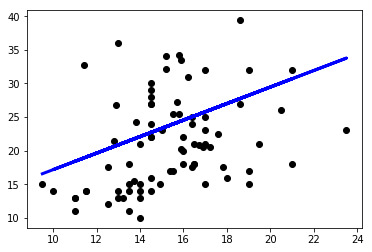

In [15]:
plt.scatter(x_test,y_test,color='black')
plt.plot(x_test, prediction, color='blue',linewidth=3)

In [16]:
#Accuracy using R-squared(score) method
regr.score(x_test,y_test)

-0.030687045403192888

In [18]:
#Printing the Coefficient, Intercept & Residue
print('Coefficient = ', regr.coef_)
print('Intercept = ', regr.intercept_)
print('Residues are \n',regr.predict(x_test) - y_test)

Coefficient =  [[ 1.22932136]]
Intercept =  [ 4.8832338]
Residues are 
 [[  4.08432162]
 [  7.54410406]
 [  2.55237551]
 [  8.0937328 ]
 [  9.0937328 ]
 [  7.86441144]
 [ -4.29160652]
 [  3.17644737]
 [  0.74861104]
 [ -6.21830313]
 [  6.55237551]
 [-11.65138896]
 [  4.55237551]
 [ -8.63108157]
 [-15.13558856]
 [  7.47907212]
 [ -7.29160652]
 [ -1.56228517]
 [  5.02042941]
 [ -1.19348876]
 [ -6.20176022]
 [ -3.75966042]
 [ 10.78169687]
 [ 10.77228569]
 [  7.16703619]
 [  8.70839348]
 [ 11.24033958]
 [  1.04410406]
 [  3.47907212]
 [ -9.99348876]
 [ 10.47907212]
 [  5.40576873]
 [ 12.0937328 ]
 [  8.24975076]
 [ -2.35213147]
 [  4.78169687]
 [  5.52756114]
 [ -4.29160652]
 [  0.70839348]
 [ 11.01101823]
 [  8.11027571]
 [  4.01928968]
 [ -1.3010177 ]
 [  4.61290046]
 [  6.8147827 ]
 [  7.85500026]
 [-13.80250273]
 [  0.04410406]
 [  5.40576873]
 [  0.32305416]
 [  9.26515396]
 [ -0.88145283]
 [ -6.05852069]
 [  7.0937328 ]
 [  6.22493639]
 [  5.15876473]
 [  6.86441144]
 [  0.78169687]


In [19]:
from sklearn.metrics import mean_squared_error
y_predict = regr.predict(x_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse
import math
math.sqrt(regression_model_mse)

6.998549117422466